# Label_Stats.ipynb

Compute summary statistics about hand-labeled data

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

## Input file locations

In [2]:
_CONLL_2_NOT_GOLD_FILE = "data/CoNLL_2_not_in_gold_FRR.csv"
_CONLL_3_NOT_GOLD_FILE = "data/CoNLL_3_not_in_gold_FRR.csv"
_CONLL_3_TRAIN_NOT_GOLD_FILE = "data/CoNLL_3_train_not_in_gold_FRR.csv"

# IN_gold files 
_CONLL_2_IN_GOLD_FILE = "data/CoNLL_2_in_gold_BC.csv"

_CONLL_3_IN_GOLD_FILE = "data/CoNLL_3_in_gold_ZGE.csv"

#conll4 Not_gold
_CONLL_4_NOT_GOLD_FILE       = "data/CoNLL_4_not_in_gold_FRR.csv"
_CONLL_4_TRAIN_NOT_GOLD_FILE = "data/CoNLL_4_train_not_in_gold_FRR.csv" 



## Read labels into dataframes

In [3]:
# Constants that govern reading CSV files
Excel_encoding = "Windows-1252"  # Excel's unchangeable default CSV encoding

# Column types in a file of examples not in the gold standard
_NOT_GOLD_DTYPES = {
    "num_teams": "Int64",
    "num_models": "Int64", 
    "fold"      : "string", 
    "doc_offset" : "Int64",
    "model_span": "string",
    "error_type": "string", 
    "corpus_span": "string",
    "corpus_ent_type": "string",
    "correct_span": "string", 
}
_NOT_GOLD_DROP_COLS = ["time_started", "time_stopped", "time_elapsed"]

_IN_GOLD_DTYPES = {
    "num_teams": "Int64",
    "num_models": "Int64", 
    "fold"      : "string", 
    "doc_offset" : "Int64",
    "corpus_span": "string",
    "error_type": "string", 
    "corpus_ent_type": "string",
    "correct_span": "string", 
}
_IN_GOLD_DROP_COLS = ["time_started", "time_stopped", "time_elapsed"]
utf_8_encoding =  "utf-8"

def read_star_gold_df(file_name,dtypes,drop_cols, encoding):
    result = (
        pd
        .read_csv(file_name, dtype=dtypes, encoding= encoding)
        .drop(columns=drop_cols)
    )
    #homogenize "num_teams" with "num_models" label to allow combination of the two datasets 
    if "num_teams" in result.columns: 
        result = result.rename(columns = {"num_teams" : "num_models"})
    if "verified" in result.columns: 
        result = result.drop(columns = "verified")
    return result[~result["error_type"].isna()].copy() 

def read_not_gold_df(file_name, encoding=Excel_encoding):
    result = read_star_gold_df(file_name,_NOT_GOLD_DTYPES,_NOT_GOLD_DROP_COLS,encoding )
    result["subset"] = "not_in_gold"
    return result

def read_in_gold_df(file_name, encoding=Excel_encoding):
    result = read_star_gold_df(file_name,_IN_GOLD_DTYPES,_IN_GOLD_DROP_COLS, encoding) # maybe process a little to add "model span" I dont think I use it though so for now I wont
    result["subset"] = "in_gold"
    return result
    


In [4]:
conll_2_not_gold_df = read_not_gold_df(_CONLL_2_NOT_GOLD_FILE, encoding=utf_8_encoding)  
conll_3_not_gold_df = pd.concat([read_not_gold_df(_CONLL_3_NOT_GOLD_FILE)
                                 ,read_not_gold_df(_CONLL_3_TRAIN_NOT_GOLD_FILE)
                                ])

conll_4_not_gold_df = pd.concat([read_not_gold_df(_CONLL_4_NOT_GOLD_FILE)
                                 ,read_not_gold_df(_CONLL_4_TRAIN_NOT_GOLD_FILE)
                                ])

conll_2_in_gold_df = read_in_gold_df(_CONLL_2_IN_GOLD_FILE, encoding=utf_8_encoding)
conll_3_in_gold_df = read_in_gold_df(_CONLL_3_IN_GOLD_FILE)



# tag with sources :
# tag with sources :
conll_2_not_gold_df['conll_2'] = True 
conll_3_not_gold_df["conll_3"] = True
conll_4_not_gold_df["conll_4"] = True


conll_2_in_gold_df["conll_2"] = True
conll_3_in_gold_df["conll_3"] = True

In [5]:
conll_4_not_gold_df

,num_models,fold,doc_offset,model_span,model_ent_type,error_type,corpus_span,corpus_ent_type,correct_span,correct_ent_type,notes,subset,conll_4
0,16,dev,0,"[2225, 2235): 'ex-England'",LOC,None,"[2225, 2235): 'ex-England'",MISC,<NA>,NaN,NaN,not_in_gold,True
1,14,dev,2,"[189, 193): 'Test'",ORG,None,"[189, 218): 'Test and County Cricket Board'",ORG,<NA>,NaN,NaN,not_in_gold,True
2,13,dev,2,"[614, 629): 'Duke of Norfolk'",ORG,None,"[614, 634): 'Duke of Norfolk's XI'",<NA>,<NA>,NaN,NaN,not_in_gold,True
3,17,dev,2,"[760, 765): 'Leeds'",LOC,Tag,<NA>,ORG,<NA>,NaN,NaN,not_in_gold,True
4,12,dev,5,"[45, 53): 'UNDER-21'",MISC,None,<NA>,<NA>,<NA>,NaN,NaN,not_in_gold,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,16,train,940,"[52, 57): 'STYLE'",LOC,None,<NA>,<NA>,<NA>,NaN,NaN,not_in_gold,True
591,17,train,944,"[1030, 1042): 'South Africa'",LOC,Sentence,"[1030, 1035): 'South'",LOC,"[1030, 1042): 'South Africa'",LOC,"Sentence boundary between ""South"" and ""Africa""",not_in_gold,True
592,17,train,944,"[1030, 1042): 'South Africa'",LOC,Sentence,"[1036, 1042): 'Africa'",LOC,"[1030, 1042): 'South Africa'",LOC,"Sentence boundary between ""South"" and ""Africa""",not_in_gold,True
593,17,train,944,"[415, 427): 'South Africa'",LOC,Sentence,"[415, 420): 'South'",LOC,"[415, 427): 'South Africa'",LOC,"Sentence boundary between ""South"" and ""Africa""",not_in_gold,True


In [6]:
print("CoNLL 2 Not in gold error types", conll_2_not_gold_df["error_type"].unique())
print("\nCoNLL 3 Not in gold error types", conll_3_not_gold_df["error_type"].unique())

print("\nCoNLL 2 In gold error types", conll_2_in_gold_df["error_type"].unique())
print("\nCoNLL 3 In gold error types", conll_3_in_gold_df["error_type"].unique())

CoNLL 2 Not in gold error types <StringArray>
['Sentence', 'None', 'Wrong', 'Token', 'Tag', 'Span', 'Both', 'Missing']
Length: 8, dtype: string

CoNLL 3 Not in gold error types <StringArray>
['None', 'Tag', 'Sentence', 'Missing', 'Token', 'Span', 'Wrong', 'Both']
Length: 8, dtype: string

CoNLL 2 In gold error types <StringArray>
['None', 'Wrong', 'Token', 'Sentence', 'Span', 'Tag', 'Missing']
Length: 7, dtype: string

CoNLL 3 In gold error types <StringArray>
['None', 'Tag', 'Sentence', 'Wrong', 'Token', 'Span', 'Missing', 'Both']
Length: 8, dtype: string


## Fill in blank values

Many fields are left blank during manual labeling because they 
can be inferred from the remaining fields.

In [7]:
def infer_corpus_span_not_gold(row):
    if not pd.isna(row["corpus_span"]):
        # Don't override values already present
        return row["corpus_span"]
    elif row["error_type"] in ["None", "Sentence", "Token", "Wrong", "Missing", "Ambiguous"]: 
        # Don't attempt inference for these error types.
        return row["corpus_span"]
    elif pd.isna(row["num_models"]):
        # Not from a team's results
        return row["corpus_span"]
    elif row["error_type"] == "Tag":
        return row["model_span"]
    else:
        raise ValueError(f"Can't infer corpus_span for row \n{row}")
        
def infer_correct_span_not_gold(row):
    if not pd.isna(row["correct_span"]):
        # Don't override values already present
        return row["correct_span"]
    elif row["error_type"] in ["None", "Wrong", "Ambiguous"]:
        # Don't attempt inference for these error types.
        return row["correct_span"]
    elif row["error_type"] == "Tag":
        #in this, case the original span was correct, just the tag needs changing
        return row["corpus_span"]
    elif pd.isna(row["num_models"]):
        # Not from a team's results
        return row["correct_span"]
    elif row["error_type"] in ["Span", "Sentence", "Token", "Both", "Missing"]:
        return row["model_span"]
    else:
        raise ValueError(f"Can't infer correct_span for row:\n{row}")
    
def infer_correct_ent_type_not_gold(row):
    if not pd.isna(row["correct_ent_type"]):
        # Don't override values already present
        return row["correct_ent_type"]
    elif row["error_type"] in ["None", "Sentence", "Token", "Wrong", "Span", "Ambiguous"]:
        # Don't attempt inference for these error types.
        return row["correct_ent_type"]
    elif pd.isna(row["num_models"]):
        # Not from a team's results
        return row["correct_ent_type"]
    elif row["error_type"] in ["Tag", "Both", "Missing"]:
        return row["model_ent_type"]
    else:
        raise ValueError(f"Can't infer correct_ent_type for row:\n{row}")
    

def infer_blanks_not_gold(df):
    ret = df.copy()
    ret["corpus_span"] = [infer_corpus_span_not_gold(r) for _, r in ret.iterrows()]
    ret["correct_span"] = [infer_correct_span_not_gold(r) for _, r in ret.iterrows()]
    ret["correct_ent_type"] = [infer_correct_ent_type_not_gold(r) for _, r in ret.iterrows()]
    return ret

#### now for the in_gold inferences: we can't quite do as much but we can try 
    #i'll have to go back over this when I have actual data to crossreference with 

def infer_correct_span_in_gold(row): 
    if not pd.isna(row["correct_span"]):
        #do nothing if correct span already exists
        return row["correct_span"]
    elif row["error_type"] in  ['Sentence', 'Token', 'Span', 'Wrong', 'Both']:
        # don't attempt to inference for these values 
        return row["correct_span"]
    elif row["error_type"] in [ "Tag", "None" ]:
        return row["corpus_span"] 
    elif pd.isna(row["num_models"]):
        # Not from a team's results
        return row["correct_span"]
    else:
        raise ValueError(f"Can't infer correct_span for row:\n{row}")


def infer_correct_ent_type_in_gold(row):
    if not pd.isna(row["correct_ent_type"]):
        # Don't override values already present
        return row["correct_ent_type"]
    elif pd.isna(row["num_models"]):
        # Not from a team's results. can't really inference. 
        return row["correct_ent_type"]
    elif row["error_type"] in ['Tag', 'Sentence', 'Token', 'Wrong', 'Both']:
        #dont attempt inference for these model types 
        return row["correct_ent_type"]
    elif row["error_type"] in ["None", "Span"]:
        return row["corpus_ent_type"]
    else:
        raise ValueError(f"Can't infer correct_span for row:\n{row}")
def infer_blanks_in_gold(df):
    ret = df.copy()
    ret["correct_span"] = [infer_correct_span_in_gold(r) for _, r in ret.iterrows()]
    ret["correct_ent_type"] = [infer_correct_ent_type_in_gold(r) for _, r in ret.iterrows()]
    return ret

conll_2_not_gold_full = infer_blanks_not_gold(conll_2_not_gold_df)
conll_3_not_gold_full = infer_blanks_not_gold(conll_3_not_gold_df)
conll_4_not_gold_full = infer_blanks_not_gold(conll_4_not_gold_df)

conll_2_in_gold_full = infer_blanks_in_gold(conll_2_in_gold_df)
conll_3_in_gold_full = infer_blanks_in_gold(conll_3_in_gold_df)

In [8]:
conll_3_in_gold_full

,num_models,fold,doc_offset,corpus_span,corpus_ent_type,error_type,correct_span,correct_ent_type,notes,subset,conll_3
0,0,dev,0,"[20, 34): 'LEICESTERSHIRE'",ORG,None,"[20, 34): 'LEICESTERSHIRE'",ORG,NaN,in_gold,True
1,0,dev,0,"[2225, 2235): 'ex-England'",MISC,None,"[2225, 2235): 'ex-England'",MISC,NaN,in_gold,True
2,0,dev,2,"[25, 30): 'ASHES'",MISC,None,"[25, 30): 'ASHES'",MISC,NaN,in_gold,True
3,<NA>,dev,2,"[525, 533): 'Scotland'",LOC,Tag,"[525, 533): 'Scotland'",ORG,cricket team,in_gold,True
4,<NA>,dev,2,"[122, 129): 'England'",LOC,Tag,"[122, 129): 'England'",ORG,cricket team,in_gold,True
...,...,...,...,...,...,...,...,...,...,...,...
1017,4,test,210,"[656, 662): 'Bolton'",ORG,None,"[656, 662): 'Bolton'",ORG,NaN,in_gold,True
1018,4,test,215,"[42, 50): 'VICTORIA'",ORG,None,"[42, 50): 'VICTORIA'",ORG,NaN,in_gold,True
1019,4,test,220,"[1203, 1210): 'HOUSTON'",LOC,Tag,"[1203, 1210): 'HOUSTON'",ORG,team,in_gold,True
1020,4,test,220,"[1226, 1235): 'CHARLOTTE'",ORG,None,"[1226, 1235): 'CHARLOTTE'",ORG,NaN,in_gold,True


In [9]:
#check for data that cannot be used, due to mis-entering
def find_bad_data(df):
    ret = df[df["fold"].isna() | df["doc_offset"].isna()]
    return ret
bad_NG_conll_2 = find_bad_data(conll_2_not_gold_full)
bad_NG_conll_3 = find_bad_data(conll_3_not_gold_full)
bad_IG_conll_2 = find_bad_data(conll_2_in_gold_full)
bad_IG_conll_3 = find_bad_data(conll_3_in_gold_full)

bad_total = bad_NG_conll_2.append(bad_NG_conll_3).append(bad_IG_conll_2).append(bad_IG_conll_3)
display(bad_total)

# if if bad_total.count() > 0:
#   raise ValueError("Found Data with no fold or document numbers")

,num_models,fold,doc_offset,model_span,model_ent_type,error_type,corpus_span,corpus_ent_type,correct_span,correct_ent_type,notes,subset,conll_2,conll_3
35,<NA>,<NA>,<NA>,<NA>,NaN,Wrong,"[2264, 2267): 'RBI'",MISC,<NA>,NaN,Run batted in,not_in_gold,NaN,True
169,<NA>,<NA>,<NA>,<NA>,NaN,Missing,<NA>,<NA>,"[410, 427): 'VERN RIFFE CENTER'",LOC,https://vrcfa.com/,not_in_gold,NaN,True
241,<NA>,<NA>,<NA>,<NA>,NaN,Span,"[267, 286): 'Hapoel Ironi Rishon'",ORG,"[267, 293): 'Hapoel Ironi Rishon Lezion'",NaN,NaN,not_in_gold,NaN,True
272,<NA>,<NA>,<NA>,<NA>,NaN,Span,"[84, 94): 'JOHNSON CO'",ORG,"[84, 95): 'JOHNSON CO.'",NaN,Sentence boundary between period and comma con...,not_in_gold,NaN,True
299,<NA>,<NA>,<NA>,<NA>,NaN,Tag,"[419, 427): 'EUROLIRA'",ORG,"[419, 427): 'EUROLIRA'",MISC,Reference to futures contracts on Euro/Lira ex...,not_in_gold,NaN,True
349,<NA>,<NA>,163,NaN,NaN,Missing,"[411, 424): 'Conservatives'",<NA>,<NA>,ORG,political party,in_gold,True,NaN
353,<NA>,<NA>,176,NaN,NaN,Tag,"[2419, 2425): 'Busang'",ORG,"[2419, 2425): 'Busang'",LOC,??? city in Indonesia that has big gold deposits,in_gold,True,NaN
354,<NA>,<NA>,176,NaN,NaN,Tag,"[2732, 2738): 'Busang'",ORG,"[2732, 2738): 'Busang'",LOC,NaN,in_gold,True,NaN


## Eliminate duplicates

Use the values we just imputed to identify instances of the same span being
fixed twice.

In [10]:
def combine_eliminate_duplicate_entries(df_in_a, df_in_b, not_in_gold=False, cross_subset=False, remove_duped_outputs = True):
    # Combines two datasets, labels and removes duplicates
    # not_in_gold - should be true if both data sets are from the not_in_gold subset, false otherwise 
    # cross_subset - should be true if the data sets are from two different subsets (i.e. one is in gold and the other is not in gold)
        # this is used for the correct label of duplicates. 
    # side effect: rearranges order of data 
    

    df_in = df_in_a.append(df_in_b, ignore_index= True)
    #sort so that when duplicates are removed, the entry with the most "hits" is preferred
    df_in = df_in.sort_values(by=["num_models_missing"], na_position='last')

    
    #label duplicates
    df_temp = df_in.fillna({"num_models" : np.nan, "corpus_span":"NA","corpus_ent_type":"NA", 
                         "correct_span":"NA"})
    df_duplicated = df_temp.duplicated(["fold", "doc_offset", "corpus_span",
                                        "corpus_ent_type","correct_span"], keep = 'last')    
    if cross_subset:
        df_in.loc[df_duplicated, 'subset'] = "both"
    else:
        df_in.loc[df_duplicated, 'dataset'] = "both"
    
    df = df_in

    #now, use df_temp to select elements to throw out, normally 
    to_remove  = df_temp.duplicated(["fold", "doc_offset", "error_type", "corpus_span",
                                        "corpus_ent_type","correct_span"], keep = 'first')
    df_temp = df_temp[~to_remove]
    df_double_counted = df_temp.duplicated(["fold", "doc_offset", "correct_ent_type","correct_span"]) & df_temp['error_type'].isin(['Sentence', 'Token', 'Span', 'Both', 'Missing'])
    
    ret = (df[(~to_remove)]).copy()
    if remove_duped_outputs: 
        ret = (ret[~df_double_counted]).copy()
    
    #reorder to improve ease of reading 
    ret.sort_values(by=["fold", "doc_offset","correct_span"], ignore_index = True, inplace=True)
    
    if ~cross_subset: 
        ret.loc[ret['dataset'] == 'both'] = fix_subset_entries(ret.loc[ret['dataset'] == 'both'])
    ret.fillna({'conll_2':False, 'conll_3' :False, 'conll_4': False}, inplace=True)
    return ret

def in_df(row, df):
    feilds = ['fold', 'doc_offset', 'correct_span', 'correct_ent_type', 'error_type', 'corpus_span', 'corpus_ent_type' ]
    df_temp = df
    for feild in feilds: 
        df_temp = df_temp[(df_temp[feild].isna() & row.isna()[feild]) | (df_temp[feild] == row[feild])]
        if df_temp.count().max() == 0: return False 
    return True
  
def fix_subset_entries(df): 
    for i, row in df.iterrows(): 
        df.at[i,"conll_3"] = in_df(row,all_labels_conll_3_not_gold) | in_df(row,all_labels_conll_3_in_gold)
        df.at[i,"conll_2"] = in_df(row,all_labels_conll_2_not_gold) | in_df(row,all_labels_conll_2_in_gold)
        df.at[i,"conll_4"] = in_df(row,all_labels_conll_4_not_gold) 
    return df

    
    
def clean_data(Df_in):
    #removes data that is currently not able to be used (location not avaliable etc.)
    df = Df_in.copy()
    ret = df[~df["error_type"].isna()]
    ret = ret[~ret["fold"].isna()]  
    ret = ret[~ret["doc_offset"].isna()]
    return df

#clean data 
all_labels_conll_2_not_gold = clean_data(conll_2_not_gold_full)
all_labels_conll_3_not_gold = clean_data(conll_3_not_gold_full)
all_labels_conll_4_not_gold = clean_data(conll_4_not_gold_full)


all_labels_conll_2_in_gold = clean_data(conll_2_in_gold_full)
all_labels_conll_3_in_gold = clean_data(conll_3_in_gold_full)


#move data to "number of models missing". This alows for more "apples to apples" comparisons
all_labels_conll_2_not_gold["num_models_missing"] =  (all_labels_conll_2_not_gold.num_models - 16)* -1# number of models used
all_labels_conll_3_not_gold["num_models_missing"] = (all_labels_conll_3_not_gold.num_models - 17)* -1# number of models used 
all_labels_conll_4_not_gold["num_models_missing"] = (all_labels_conll_4_not_gold.num_models - 17)* -1# number of models used 
all_labels_conll_2_in_gold ["num_models_missing"] = all_labels_conll_2_in_gold.num_models
all_labels_conll_3_in_gold ["num_models_missing"] = all_labels_conll_3_in_gold.num_models


all_labels_conll_2_not_gold["agreeing_models"] =  all_labels_conll_2_not_gold.num_models
all_labels_conll_2_not_gold["agreeing_models"] =  all_labels_conll_2_not_gold.num_models
all_labels_conll_2_not_gold["agreeing_models"] =  all_labels_conll_2_not_gold.num_models
all_labels_conll_2_in_gold ["agreeing_models"] = 16 - all_labels_conll_2_in_gold.num_models
all_labels_conll_3_in_gold ["agreeing_models"] = 17 - all_labels_conll_3_in_gold.num_models


#combine dataframes, and remove duplicates 
#Note: due to the scemantics involved duplicate entries will defer to the first of two sets entered 

# merge like subsets first 
all_labels_not_in_gold = combine_eliminate_duplicate_entries(all_labels_conll_2_not_gold, all_labels_conll_3_not_gold, not_in_gold=True)
all_labels_not_in_gold = combine_eliminate_duplicate_entries(all_labels_not_in_gold, all_labels_conll_4_not_gold, not_in_gold=True)


all_labels_in_gold = combine_eliminate_duplicate_entries(all_labels_conll_2_in_gold, all_labels_conll_3_in_gold)

# then merge between subsets
all_labels = combine_eliminate_duplicate_entries( all_labels_not_in_gold, all_labels_in_gold , cross_subset= True)
#display all_labels
all_labels.head(14)

/home/hong/.venvs/text-extensions/lib64/python3.6/site-packages/pandas-1.0.5-py3.6-linux-x86_64.egg/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/hong/.venvs/text-extensions/lib64/python3.6/site-packages/pandas-1.0.5-py3.6-linux-x86_64.egg/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/hong/.venvs/text-extensions/lib64/python3.6/site-packages/pandas-1.0.5-py3.6-linux-x86_64.egg/pa

,num_models,fold,doc_offset,model_span,model_ent_type,error_type,corpus_span,corpus_ent_type,correct_span,correct_ent_type,notes,subset,conll_2,num_models_missing,agreeing_models,conll_3,dataset,conll_4
0,0,dev,0,NaN,NaN,None,"[20, 34): 'LEICESTERSHIRE'",ORG,"[20, 34): 'LEICESTERSHIRE'",ORG,NaN,in_gold,False,0,17,True,NaN,False
1,0,dev,0,NaN,NaN,None,"[2225, 2235): 'ex-England'",MISC,"[2225, 2235): 'ex-England'",MISC,NaN,in_gold,False,0,17,True,NaN,False
2,17,dev,0,"[2225, 2235): 'ex-England'",LOC,None,<NA>,MISC,<NA>,NaN,NaN,not_in_gold,False,0,NaN,True,NaN,False
3,16,dev,0,"[2225, 2235): 'ex-England'",LOC,None,"[2225, 2235): 'ex-England'",MISC,<NA>,NaN,NaN,not_in_gold,False,1,NaN,False,NaN,True
4,<NA>,dev,2,<NA>,NaN,Tag,"[122, 129): 'England'",LOC,"[122, 129): 'England'",ORG,Cricket team,both,False,<NA>,NaN,True,NaN,False
5,<NA>,dev,2,<NA>,NaN,Tag,"[1354, 1362): 'Scotland'",LOC,"[1354, 1362): 'Scotland'",ORG,NaN,not_in_gold,False,<NA>,NaN,True,NaN,False
6,2,dev,2,NaN,NaN,None,"[189, 218): 'Test and County Cricket Board'",ORG,"[189, 218): 'Test and County Cricket Board'",ORG,NaN,in_gold,False,2,15,True,NaN,False
7,<NA>,dev,2,<NA>,NaN,Tag,"[235, 244): 'Australia'",LOC,"[235, 244): 'Australia'",ORG,Cricket team,not_in_gold,False,<NA>,NaN,True,NaN,False
8,0,dev,2,NaN,NaN,None,"[25, 30): 'ASHES'",MISC,"[25, 30): 'ASHES'",MISC,teams label as ORG,in_gold,True,0,16,True,both,False
9,<NA>,dev,2,<NA>,NaN,Tag,"[525, 533): 'Scotland'",LOC,"[525, 533): 'Scotland'",ORG,Cricket team,both,False,<NA>,NaN,True,NaN,False


In [11]:
all_labels.loc[:,"hand_labelled"] = all_labels["num_models"].isna()
all_labels.loc[all_labels["hand_labelled"], 'conll_2'] = False
all_labels.loc[all_labels["hand_labelled"], 'conll_3'] = False
all_labels.loc[all_labels["hand_labelled"], 'conll_4'] = False


In [12]:
# "Manual" labels -- those found by hand in the vicinity of labels that were
# suggested by our scripts -- should't overlap with any of the automatic ones.
manual_labels = all_labels[all_labels["num_models"].isna()]

#currently, dataframe.duplicated doesn't work well when NA values exist, so we remove them temporarily
manual_labels_filled = manual_labels.fillna({"corpus_span":"NA",
                                             "corpus_ent_type":"NA", 
                                             "correct_span":"NA"})
 
# First check that they don't overlap with each other.
duplicate_manual_labels = manual_labels_filled.duplicated(["fold", "doc_offset", 
                                                           "error_type", "corpus_span",
                                                        "corpus_ent_type","correct_span"])
manual_labels_filled[duplicate_manual_labels]

,num_models,fold,doc_offset,model_span,model_ent_type,error_type,corpus_span,corpus_ent_type,correct_span,correct_ent_type,notes,subset,conll_2,num_models_missing,agreeing_models,conll_3,dataset,conll_4,hand_labelled


In [13]:
if duplicate_manual_labels.sum() > 0:
    raise ValueError("Found {duplicate_manual_labels.sum()} duplicate manual labels")

In [14]:
# Now we can check for overlap between manual and automatic labels
auto_labels = all_labels[~all_labels["num_models"].isna()]

#currently, dataframe.duplicated doesn't work well when NA values exist, so we remove them temporarily
auto_labels_filled = auto_labels.fillna({ "corpus_span":"NA",
                                             "corpus_ent_type":"NA", 
                                             "correct_span":"NA"})

merge_cols = ["fold", "doc_offset", "error_type", "corpus_span"]
shared_labels = (
    pd.merge(auto_labels_filled, manual_labels_filled, on=merge_cols, suffixes=["_auto", "_manual"])
    .sort_values(["fold", "doc_offset", "error_type"])
)

# This dataframe in its current form can have some false positives. Check manually.
pd.options.display.max_columns = None
shared_labels 

,num_models_auto,fold,doc_offset,model_span_auto,model_ent_type_auto,error_type,corpus_span,corpus_ent_type_auto,correct_span_auto,correct_ent_type_auto,notes_auto,subset_auto,conll_2_auto,num_models_missing_auto,agreeing_models_auto,conll_3_auto,dataset_auto,conll_4_auto,hand_labelled_auto,num_models_manual,model_span_manual,model_ent_type_manual,corpus_ent_type_manual,correct_span_manual,correct_ent_type_manual,notes_manual,subset_manual,conll_2_manual,num_models_missing_manual,agreeing_models_manual,conll_3_manual,dataset_manual,conll_4_manual,hand_labelled_manual
0,3,dev,15,NaN,NaN,Token,"[41, 51): 'CUNNINGHAM'",PER,"(33,51] 'RANDALL CUNNINGHAM'",NaN,NaN,in_gold,False,3,14,True,NaN,False,False,<NA>,NaN,NaN,PER,"(33, 51]: 'RANDALL CUNNINGHAM'",NaN,"need to split on '-' ""FOOTBALL-RANDALL""",in_gold,False,<NA>,<NA>,False,NaN,False,True
1,3,dev,15,NaN,NaN,Token,"[41, 51): 'CUNNINGHAM'",PER,"(33,51] 'RANDALL CUNNINGHAM'",NaN,NaN,in_gold,False,3,14,True,NaN,False,False,<NA>,NaN,NaN,PER,"[33,51): 'RANDALL CUNNINGHAM'",MISC,Caused by above token error. Span error in rea...,in_gold,False,<NA>,<NA>,False,NaN,False,True
2,15,dev,33,"[11, 16): 'NYMEX'",LOC,Missing,NA,NA,"[11, 16): 'NYMEX'",ORG,NYMEX heating oil near session lows in pre-close.,not_in_gold,False,2,NaN,True,both,False,False,<NA>,<NA>,NaN,NA,"[81, 86): 'NYMEX'",MISC,"New York Mercantile Exchange, used as an adjec...",not_in_gold,False,<NA>,NaN,False,NaN,False,True
3,16,dev,33,"[1186, 1191): 'NYMEX'",ORG,Missing,NA,NA,"[1186, 1191): 'NYMEX'",ORG,New York Mercantile Exchange,not_in_gold,False,1,NaN,True,both,True,False,<NA>,<NA>,NaN,NA,"[81, 86): 'NYMEX'",MISC,"New York Mercantile Exchange, used as an adjec...",not_in_gold,False,<NA>,NaN,False,NaN,False,True
4,0,dev,112,NaN,NaN,Wrong,"[3804, 3807): 'ERA'",MISC,NA,NaN,NaN,both,False,0,17,True,NaN,False,False,<NA>,<NA>,NaN,NA,NA,NaN,"Abbreviation for ""earned run average"", which i...",not_in_gold,False,<NA>,NaN,False,NaN,False,True
5,0,test,3,NaN,NaN,Token,"[21, 37): 'SKIING-WORLD CUP'",MISC,"[28,37)'WORLD CUP'",NaN,CHECK span later,in_gold,False,0,17,True,NaN,False,False,<NA>,<NA>,NaN,MISC,"[28, 37): 'WORLD CUP'",MISC,NaN,not_in_gold,False,<NA>,NaN,False,both,False,True
6,12,test,23,"[427, 435): 'ATLANTIC'",ORG,None,"[427, 435): 'ATLANTIC'",LOC,NA,NaN,NaN,not_in_gold,False,5,NaN,False,NaN,True,False,<NA>,NaN,NaN,LOC,"[427, 435): 'ATLANTIC'",NaN,"ambiguous, might be MISC because adjective [42...",in_gold,False,<NA>,<NA>,False,NaN,False,True
7,7,test,23,"[853, 869): 'PACIFIC DIVISION'",MISC,None,"[853, 860): 'PACIFIC'",LOC,NA,NaN,Divisions of leagues not considered entities,not_in_gold,True,9,7,False,NaN,False,False,<NA>,NaN,NaN,LOC,"[853, 860): 'PACIFIC'",NaN,"ambiguous, might be MISC because adjective [85...",in_gold,False,<NA>,<NA>,False,NaN,False,True
8,2,test,56,NaN,NaN,Token,"[11, 16): 'UK-US'",MISC,"[11, 13): 'UK'",LOC,NaN,in_gold,False,2,15,True,NaN,False,False,<NA>,NaN,NaN,MISC,"[11,13) 'UK'",LOC,Note this is probably an edge case for token e...,in_gold,False,<NA>,<NA>,False,NaN,False,True
9,2,test,56,NaN,NaN,Token,"[11, 16): 'UK-US'",MISC,"[11, 13): 'UK'",LOC,NaN,in_gold,False,2,15,True,NaN,False,False,<NA>,NaN,NaN,MISC,"[14, 16): 'US'",LOC,NaN,in_gold,False,<NA>,<NA>,False,NaN,False,True


## Count up how many of each type of error we found

In [15]:

def make_counts(labels_df):
    ans = (
        labels_df[["num_models_missing", "fold", "error_type"]]
        .groupby(["num_models_missing", "fold", "error_type"])
        .aggregate({"num_models_missing": "count"})
        .rename(columns={"num_models_missing": "total"})
        .reset_index()
    )
    return ans

counts_df = make_counts(all_labels)
counts_df_conll_3 = make_counts(all_labels[all_labels["conll_3"]])
counts_df_conll_2 = make_counts(all_labels[all_labels["conll_2"] ])
counts_df_conll_4 = make_counts(all_labels[all_labels["conll_4"] ])
#legacy name for now 
counts_df_both_datasets = make_counts(all_labels[all_labels["conll_2"] & all_labels["conll_3"] ])

#look at In gold (IG) vs Not In Gold (NG)datasets
counts_df_IG = make_counts(all_labels_in_gold)
counts_df_NG = make_counts(all_labels_not_in_gold)
counts_df_both_subsets = make_counts(all_labels[(all_labels["subset"] == "both")])

#maybe try in gold vs Not gold differentiation for conll2 vs 3? 
counts_df_conll_3_NG = make_counts(all_labels_conll_3_not_gold)
counts_df_conll_2_NG = make_counts(all_labels_conll_2_not_gold)
counts_df_both_NG =    make_counts(all_labels_not_in_gold[all_labels_not_in_gold["dataset"] == "both"])

counts_df_conll_3_IG = make_counts(all_labels_conll_3_in_gold)
counts_df_conll_2_IG = make_counts(all_labels_conll_2_in_gold)
counts_df_both_IG =    make_counts(all_labels_in_gold[all_labels_in_gold["dataset"] == "both"])

counts_df_conll_3_both = make_counts(all_labels[(all_labels["subset"]=="both")& (all_labels["conll_3"])])
counts_df_conll_2_both = make_counts(all_labels[(all_labels["subset"]=="both")& (all_labels["conll_2"])])
counts_df_conll_both_both = make_counts(all_labels[(all_labels["subset"]=="both")& (all_labels["conll_2"] & all_labels["conll_3"])])




#also run this on a file-by-file basis for later analysis 
counts_df_conll_both_both

,num_models_missing,fold,error_type,total
0,0,dev,Span,2
1,0,dev,Tag,3
2,0,dev,Token,1
3,0,dev,Wrong,1
4,0,test,Both,1
5,0,test,None,2
6,0,test,Sentence,4
7,0,test,Span,2
8,0,test,Tag,27
9,0,test,Token,2


In [16]:
# counts_df doesn't include errors that were found by inspection but weren't
# flagged by any model. Count those separately.
non_model_errors = all_labels[all_labels["num_models"].isna()]
non_model_errors.head()

,num_models,fold,doc_offset,model_span,model_ent_type,error_type,corpus_span,corpus_ent_type,correct_span,correct_ent_type,notes,subset,conll_2,num_models_missing,agreeing_models,conll_3,dataset,conll_4,hand_labelled
4,<NA>,dev,2,<NA>,NaN,Tag,"[122, 129): 'England'",LOC,"[122, 129): 'England'",ORG,Cricket team,both,False,<NA>,NaN,False,NaN,False,True
5,<NA>,dev,2,<NA>,NaN,Tag,"[1354, 1362): 'Scotland'",LOC,"[1354, 1362): 'Scotland'",ORG,NaN,not_in_gold,False,<NA>,NaN,False,NaN,False,True
7,<NA>,dev,2,<NA>,NaN,Tag,"[235, 244): 'Australia'",LOC,"[235, 244): 'Australia'",ORG,Cricket team,not_in_gold,False,<NA>,NaN,False,NaN,False,True
9,<NA>,dev,2,<NA>,NaN,Tag,"[525, 533): 'Scotland'",LOC,"[525, 533): 'Scotland'",ORG,Cricket team,both,False,<NA>,NaN,False,NaN,False,True
10,<NA>,dev,2,<NA>,NaN,Tag,"[61, 70): 'Australia'",LOC,"[61, 70): 'Australia'",ORG,Cricket team,both,False,<NA>,NaN,False,NaN,False,True


In [17]:
def count_model_errs(counts, fold):
    ans = counts[(counts["error_type"] != "None") & (counts["fold"] == fold)]["total"].sum()
    return ans 

def error_report(fold_name, pretty_fold_name):
    model_errors = count_model_errs(counts_df, fold_name)
    model_errors_conll_2 = count_model_errs(counts_df_conll_2, fold_name)
    model_errors_conll_3 = count_model_errs(counts_df_conll_3, fold_name)
    model_errors_both = count_model_errs(counts_df_both_subsets, fold_name)

    fold_non_model_errors = len(non_model_errors[non_model_errors["fold"] == fold_name].index)
    total_errors = model_errors + fold_non_model_errors

    print(f"{pretty_fold_name} set: \n Found {total_errors} errors in total "
          f"({model_errors} from models and {fold_non_model_errors} "
          f"from inspecting documents)")
    print(f" CoNLL 2 model found {model_errors_conll_2} errors\n"
          f" CoNLL 3 model found {model_errors_conll_3} errors")
    print(f" {model_errors_both} errors were found by both models" )

error_report("train", "Train")
error_report("dev", "Development")
error_report("test", "Test")

Train set: 
 Found 448 errors in total (250 from models and 198 from inspecting documents)
 CoNLL 2 model found 0 errors
 CoNLL 3 model found 128 errors
 4 errors were found by both models
Development set: 
 Found 295 errors in total (187 from models and 108 from inspecting documents)
 CoNLL 2 model found 41 errors
 CoNLL 3 model found 145 errors
 67 errors were found by both models
Test set: 
 Found 460 errors in total (359 from models and 101 from inspecting documents)
 CoNLL 2 model found 143 errors
 CoNLL 3 model found 278 errors
 129 errors were found by both models


In [18]:
#compare incedence on In gold vs Not in Gold over all folds 
total_model_errors =     counts_df[(counts_df["error_type"] != "None")]["total"].sum()
IG_total_model_errors =  counts_df_IG[counts_df_IG["error_type"] != "None"]["total"].sum()
NG_total_model_errors =  counts_df_NG[counts_df_NG["error_type"] != "None"]["total"].sum()
both_total_model_errors =counts_df_both_subsets[counts_df_both_subsets["error_type"] != "None"]["total"].sum()
print(f"Total errors found:\n Models found {total_model_errors} errors. ({len(non_model_errors.index)} additional errors found by inspecting documents)")
print(f" {IG_total_model_errors}  errors were found from the In Gold subset \n {NG_total_model_errors} errors were found from the Not In Gold subset")
print(f" {both_total_model_errors}  errors were found from both subsets")

print("\n\nBeakdown by fold: ")

def error_breakdown_report(fold_name, pretty_fold_name):
    model_errors = count_model_errs(counts_df, fold_name)
    IG_dev_errors = count_model_errs(counts_df_IG, fold_name)
    NG_dev_errors = count_model_errs(counts_df_NG, fold_name)
    both_dev_errors = count_model_errs(counts_df_both_subsets, fold_name)
    overlap_percent_total = (both_dev_errors/model_errors)*100.0 
    print(f"{pretty_fold_name} Set:\n Models found {model_errors} errors")
    print(f" {IG_dev_errors} errors were found from the In Gold subset\n"
          f" {NG_dev_errors} errors were found from the Not In Gold subset\n"
          f" {both_dev_errors}  errors were found from both subsets    ({overlap_percent_total:2.1f}% of errors were found in both subsets)")

error_breakdown_report("train", "Train")
error_breakdown_report("dev", "Development")
error_breakdown_report("test", "Test")

Total errors found:
 Models found 796 errors. (420 additional errors found by inspecting documents)
 392  errors were found from the In Gold subset 
 555 errors were found from the Not In Gold subset
 200  errors were found from both subsets


Beakdown by fold: 
Train Set:
 Models found 250 errors
 0 errors were found from the In Gold subset
 250 errors were found from the Not In Gold subset
 4  errors were found from both subsets    (1.6% of errors were found in both subsets)
Development Set:
 Models found 187 errors
 133 errors were found from the In Gold subset
 110 errors were found from the Not In Gold subset
 67  errors were found from both subsets    (35.8% of errors were found in both subsets)
Test Set:
 Models found 359 errors
 259 errors were found from the In Gold subset
 195 errors were found from the Not In Gold subset
 129  errors were found from both subsets    (35.9% of errors were found in both subsets)


In [19]:
def find_error_counts_by_num_teams(counts, combine_folds= False):
    groupby_set = ["num_models_missing"] if combine_folds else ["num_models_missing", "fold"]
    errors_by_model_hits = (
        counts[counts["error_type"] != "None"]
        .groupby(groupby_set)
        .aggregate({"total": "sum"})
        .rename(columns={"total": "errors"})
        .reset_index()
    )
    if combine_folds: 
        
        not_errors_by_model_hits = (
            counts[counts["error_type"] == "None"]
            .groupby(groupby_set).aggregate({"total":"sum"})
            .rename(columns={"total": "not_errors"}).reset_index()
        )
    else:
        not_errors_by_model_hits = (
            counts[counts["error_type"] == "None"]
            [["num_models_missing", "fold", "total"]]
            .rename(columns={"total": "not_errors"})
        )
    error_counts_by_num_teams = pd.merge(errors_by_model_hits, not_errors_by_model_hits)
    error_counts_by_num_teams["fraction_errors"] = (
        error_counts_by_num_teams["errors"] / (error_counts_by_num_teams["errors"] + error_counts_by_num_teams["not_errors"])
    )
    return error_counts_by_num_teams

#total
error_counts_by_num_teams_total = find_error_counts_by_num_teams(counts_df)
error_counts_by_num_teams_total_combined = find_error_counts_by_num_teams(counts_df, combine_folds = True)

#seperate by dataset
error_counts_by_num_teams_conll_2 = find_error_counts_by_num_teams(counts_df_conll_2)
error_counts_by_num_teams_conll_2_combined = find_error_counts_by_num_teams(counts_df_conll_2, combine_folds = True)

error_counts_by_num_teams_conll_3 = find_error_counts_by_num_teams(counts_df_conll_3)
error_counts_by_num_teams_conll_3_combined = find_error_counts_by_num_teams(counts_df_conll_3, combine_folds = True)

#the in gold data has much lower "hit"rate, so also create a copy that excludes in_gold

error_counts_by_num_teams_conll_2_NG = find_error_counts_by_num_teams(counts_df_conll_2_NG)
error_counts_by_num_teams_conll_2_NG_combined = find_error_counts_by_num_teams(counts_df_conll_2_NG, combine_folds= True)

error_counts_by_num_teams_conll_3_NG = find_error_counts_by_num_teams(counts_df_conll_3_NG)
error_counts_by_num_teams_conll_3_NG_combined = find_error_counts_by_num_teams(counts_df_conll_3_NG, combine_folds= True)


#seperate by subset 
error_counts_by_num_teams_IG = find_error_counts_by_num_teams(counts_df_IG)
error_counts_by_num_teams_IG_combined = find_error_counts_by_num_teams(counts_df_IG, combine_folds = True)

error_counts_by_num_teams_NG = find_error_counts_by_num_teams(counts_df_NG)
error_counts_by_num_teams_NG_combined = find_error_counts_by_num_teams(counts_df_NG, combine_folds = True)

#display one example 
error_counts_by_num_teams_IG_combined

,num_models_missing,errors,not_errors,fraction_errors
0,0,267,429,0.383621
1,1,59,161,0.268182
2,2,27,141,0.160714
3,3,25,57,0.304878
4,4,14,45,0.237288


In [20]:
def find_error_counts_by_num_teams(counts, combine_folds= False):
    groupby_set = ["num_models_missing"] if combine_folds else ["num_models_missing", "fold"]
    errors_by_model_hits = (
        counts[counts["error_type"] != "None"]
        .groupby(groupby_set)
        .aggregate({"total": "sum"})
        .rename(columns={"total": "errors"})
        .reset_index()
    )
    if combine_folds: 
        
        not_errors_by_model_hits = (
            counts[counts["error_type"] == "None"]
            .groupby(groupby_set).aggregate({"total":"sum"})
            .rename(columns={"total": "not_errors"}).reset_index()
        )
    else:
        not_errors_by_model_hits = (
            counts[counts["error_type"] == "None"]
            [["num_models_missing", "fold", "total"]]
            .rename(columns={"total": "not_errors"})
        )
    error_counts_by_num_teams = pd.merge(errors_by_model_hits, not_errors_by_model_hits)
    error_counts_by_num_teams["fraction_errors"] = (
        error_counts_by_num_teams["errors"] / (error_counts_by_num_teams["errors"] + error_counts_by_num_teams["not_errors"])
    )
    return error_counts_by_num_teams

#total
error_counts_by_num_teams_total = find_error_counts_by_num_teams(counts_df)
error_counts_by_num_teams_total_combined = find_error_counts_by_num_teams(counts_df, combine_folds = True)

#seperate by dataset
error_counts_by_num_teams_conll_2 = find_error_counts_by_num_teams(counts_df_conll_2)
error_counts_by_num_teams_conll_2_combined = find_error_counts_by_num_teams(counts_df_conll_2, combine_folds = True)

error_counts_by_num_teams_conll_3 = find_error_counts_by_num_teams(counts_df_conll_3)
error_counts_by_num_teams_conll_3_combined = find_error_counts_by_num_teams(counts_df_conll_3, combine_folds = True)

#the in gold data has much lower "hit"rate, so also create a copy that excludes in_gold

error_counts_by_num_teams_conll_2_NG = find_error_counts_by_num_teams(counts_df_conll_2_NG)
error_counts_by_num_teams_conll_2_NG_combined = find_error_counts_by_num_teams(counts_df_conll_2_NG, combine_folds= True)

error_counts_by_num_teams_conll_3_NG = find_error_counts_by_num_teams(counts_df_conll_3_NG)
error_counts_by_num_teams_conll_3_NG_combined = find_error_counts_by_num_teams(counts_df_conll_3_NG, combine_folds= True)


#seperate by subset 
error_counts_by_num_teams_IG = find_error_counts_by_num_teams(counts_df_IG)
error_counts_by_num_teams_IG_combined = find_error_counts_by_num_teams(counts_df_IG, combine_folds = True)

error_counts_by_num_teams_NG = find_error_counts_by_num_teams(counts_df_NG)
error_counts_by_num_teams_NG_combined = find_error_counts_by_num_teams(counts_df_NG, combine_folds = True)

#display one example 
error_counts_by_num_teams_conll_2_combined

,num_models_missing,errors,not_errors,fraction_errors
0,0,112,247,0.311978
1,1,24,110,0.179104
2,2,10,119,0.077519
3,3,6,25,0.193548
4,4,4,40,0.090909
5,5,2,37,0.051282
6,6,4,36,0.100000
7,7,6,48,0.111111
8,8,10,47,0.175439
9,9,6,61,0.089552


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


{'Fold': 'total',
 'Original models': 184,
 'Custom models': 551,
 'Custom models with cross validation': 310,
 'Original models and custom models': 101,
 'Custom models and cross validated custom models': 143,
 'Original models and cross validated models': 68,
 'All models': 63}

<Figure size 1008x504 with 0 Axes>

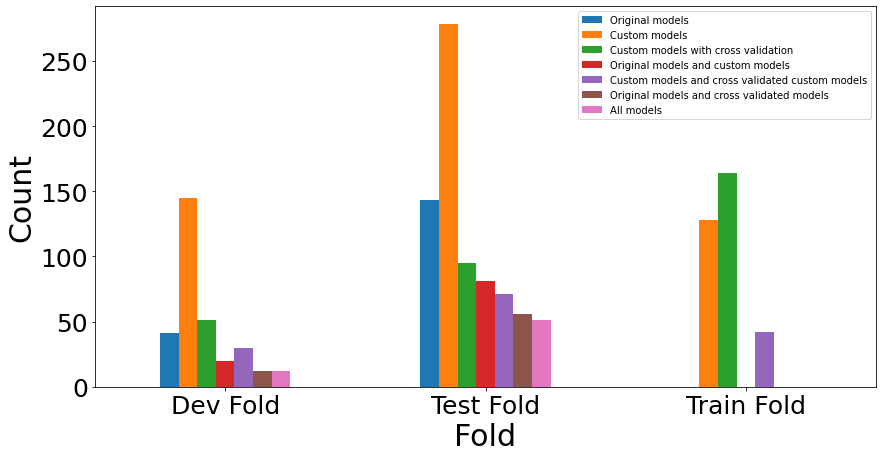

In [37]:
#break down into chart from total errors

def gen_by_dset_counts(df, name):
    counts_by_source = {}
    counts_by_source["Fold"] = name
    counts_by_source ["Original models"] = df[df["conll_2"]].shape[0]
    counts_by_source["Custom models"] = df[df["conll_3"]].shape[0]
    counts_by_source["Custom models with cross validation"] = df[df["conll_4"]].shape[0]
    counts_by_source["Original models and custom models"] = df[df["conll_2"] & df["conll_3"]].shape[0]
    counts_by_source["Custom models and cross validated custom models"] = df[df["conll_3"] & df["conll_4"]].shape[0]
    counts_by_source["Original models and cross validated models"] = df[df["conll_2"] & df["conll_4"]].shape[0]
    counts_by_source["All models"] = df[df["conll_2"]& df["conll_3"] & df["conll_4"]].shape[0]
    
    return counts_by_source
def savefig( filename): 
    plt.savefig( "images/"+ filename +".png", bbox_inches="tight")
    plt.savefig( "images/"+ filename +".pdf", bbox_inches="tight")
    plt.savefig( "images/"+ filename +".eps", bbox_inches="tight")

full_model_counts = gen_by_dset_counts(all_labels[all_labels["error_type"] != "None"], name="total")
dev_counts = gen_by_dset_counts(all_labels[(all_labels["error_type"] != "None") & (all_labels["fold"]=='dev')],name="Dev Fold")
test_counts = gen_by_dset_counts(all_labels[(all_labels["error_type"] != "None") & (all_labels["fold"]=='test')],name="Test Fold")
train_counts = gen_by_dset_counts(all_labels[(all_labels["error_type"] != "None") & (all_labels["fold"]=='train')], name="Train Fold")
count_list = [ dev_counts, test_counts, train_counts]
df_counts = pd.DataFrame(count_list)
df_counts

plt.figure('a')
ax = df_counts.plot("Fold", ["Original models", "Custom models","Custom models with cross validation","Original models and custom models","Custom models and cross validated custom models","Original models and cross validated models","All models"], kind = "bar")
                 #title = "Errors found by each model, by Fold"
ax.tick_params(axis='both', labelsize=25, labelrotation=0)
ax.set_ylabel('Count', fontsize=30)
ax.set_xlabel('Fold', fontsize=30)
savefig("Err_distribution_by_document")

full_model_counts

## Display frequencies for the Not_in_gold subset
Currently we don't have enough data from the in gold data sets to be able to generate a meaningful comparison, so we'll stick with the Not_In_gold subset for now 

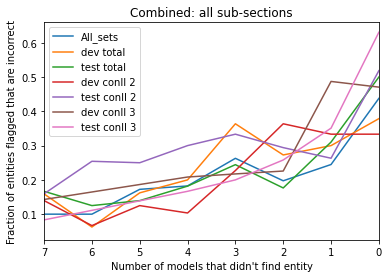

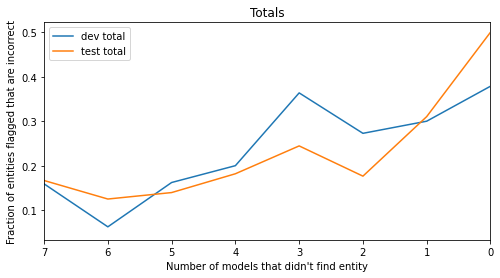

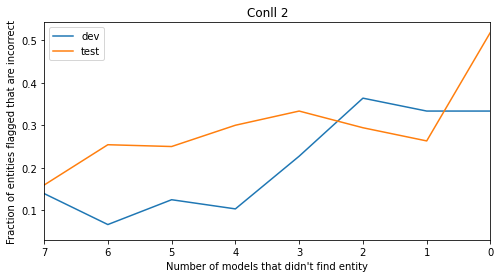

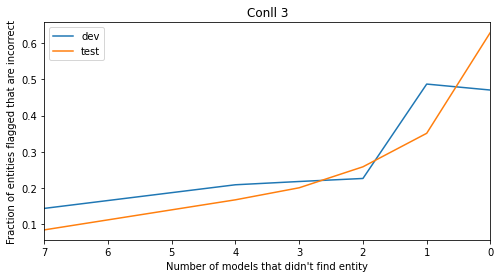

In [22]:
df_total = error_counts_by_num_teams_NG
dev_df_total = df_total[df_total["fold"] == "dev"]
test_df_total = df_total[df_total["fold"] == "test"]

df_conll_2 = error_counts_by_num_teams_conll_2_NG
dev_df_conll_2 = df_conll_2[df_conll_2["fold"] == "dev"]
test_df_conll_2 = df_conll_2[df_conll_2["fold"] == "test"]

df_conll_3 = error_counts_by_num_teams_conll_3_NG
dev_df_conll_3 = df_conll_3[df_conll_3["fold"] == "dev"]
test_df_conll_3 = df_conll_3[df_conll_3["fold"] == "test"]

plt.plot(error_counts_by_num_teams_total_combined ["num_models_missing"], error_counts_by_num_teams_total_combined["fraction_errors"], label="All_sets")

plt.plot(dev_df_total ["num_models_missing"], dev_df_total["fraction_errors"], label="dev total")
plt.plot(test_df_total ["num_models_missing"], test_df_total["fraction_errors"], label="test total")

plt.plot(dev_df_conll_2 ["num_models_missing"], dev_df_conll_2["fraction_errors"], label="dev conll 2")
plt.plot(test_df_conll_2 ["num_models_missing"], test_df_conll_2["fraction_errors"], label="test conll 2")

plt.plot(dev_df_conll_3 ["num_models_missing"], dev_df_conll_3["fraction_errors"], label="dev conll 3")
plt.plot(test_df_conll_3 ["num_models_missing"], test_df_conll_3["fraction_errors"], label="test conll 3")


plt.xlim((7,0))
plt.xlabel("Number of models that didn't find entity")
plt.ylabel("Fraction of entities flagged that are incorrect")
plt.title("Combined: all sub-sections")
plt.legend()
plt.rcParams["figure.figsize"] = [14,7]
plt.show()

plt.figure(figsize = [8, 4])
plt.xlim((7,0))
plt.xlabel("Number of models that didn't find entity")
plt.ylabel("Fraction of entities flagged that are incorrect")
plt.title("Totals")
plt.plot(dev_df_total ["num_models_missing"], dev_df_total["fraction_errors"], label="dev total")
plt.plot(test_df_total ["num_models_missing"], test_df_total["fraction_errors"], label="test total")
plt.legend()
plt.show()

plt.figure(figsize = [8, 4])
plt.xlim((7,0))
plt.xlabel("Number of models that didn't find entity")
plt.ylabel("Fraction of entities flagged that are incorrect")
plt.title("Conll 2")
plt.plot(dev_df_conll_2 ["num_models_missing"], dev_df_conll_2["fraction_errors"], label="dev")
plt.plot(test_df_conll_2 ["num_models_missing"], test_df_conll_2["fraction_errors"], label="test")
plt.legend()
plt.show()

plt.figure(figsize = [8, 4])
plt.xlim((7,0))
plt.xlabel("Number of models that didn't find entity")
plt.ylabel("Fraction of entities flagged that are incorrect")
plt.title("Conll 3")
plt.plot(dev_df_conll_3 ["num_models_missing"], dev_df_conll_3["fraction_errors"], label="dev")
plt.plot(test_df_conll_3 ["num_models_missing"], test_df_conll_3["fraction_errors"], label="test")
plt.legend()
plt.show()

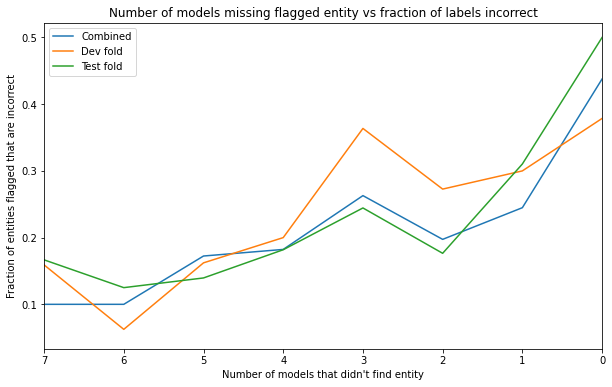

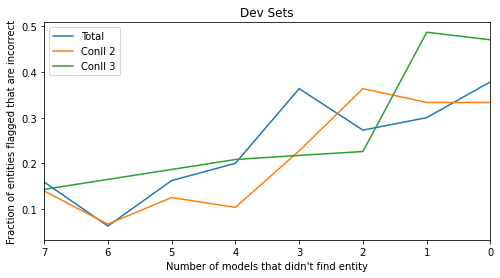

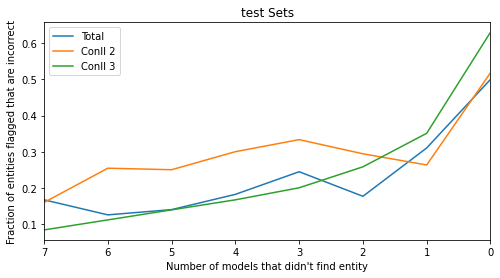

In [23]:
# now look at dev only  and test only

plt.figure(figsize = [10, 6])
plt.xlim((7,0))
plt.xlabel("Number of models that didn't find entity")
plt.ylabel("Fraction of entities flagged that are incorrect")
plt.title("Number of models missing flagged entity vs fraction of labels incorrect")
plt.plot(error_counts_by_num_teams_total_combined ["num_models_missing"], error_counts_by_num_teams_total_combined["fraction_errors"], label="Combined")
plt.plot(dev_df_total ["num_models_missing"], dev_df_total ["fraction_errors"], label="Dev fold")
plt.plot(test_df_total ["num_models_missing"], test_df_total ["fraction_errors"], label="Test fold")
plt.legend()
plt.show()



plt.figure(figsize = [8, 4])
plt.xlim((7,0))
plt.xlabel("Number of models that didn't find entity")
plt.ylabel("Fraction of entities flagged that are incorrect")
plt.title("Dev Sets")
plt.plot(dev_df_total ["num_models_missing"], dev_df_total ["fraction_errors"], label="Total")
plt.plot(dev_df_conll_2 ["num_models_missing"], dev_df_conll_2["fraction_errors"], label="Conll 2")
plt.plot(dev_df_conll_3 ["num_models_missing"], dev_df_conll_3["fraction_errors"], label="Conll 3")

plt.legend()
plt.show()


plt.figure(figsize = [8, 4])
plt.xlim((7,0))
plt.xlabel("Number of models that didn't find entity")
plt.ylabel("Fraction of entities flagged that are incorrect")
plt.title("test Sets")
plt.plot(test_df_total ["num_models_missing"], test_df_total ["fraction_errors"], label="Total")
plt.plot(test_df_conll_2 ["num_models_missing"], test_df_conll_2["fraction_errors"], label="Conll 2")
plt.plot(test_df_conll_3 ["num_models_missing"], test_df_conll_3["fraction_errors"], label="Conll 3")


plt.legend()
plt.show()




## Look at data by error type

In [24]:
#break data into sections based on their tags. Later we will do some similar analysis to above, so maintain other data
# use a dictionary to store the info based on different tags. For now we will analyze each tag seperately 
Error_types = ['Sentence', 'Wrong', 'Token', 'Tag', 'Span', 'Both', 'Missing']
ignore_types = [ 'None']
labels_by_error_type = {}


#all_labels_above_seven = all_labels[all_labels["num_models_missing"] <= 7]

for error_type in Error_types:
    labels_by_error_type[error_type] = all_labels[all_labels["error_type"] == error_type].copy()

# now seperate out into counts for some preliminary analysis

row_list = []
for e_type in Error_types: 
        df = labels_by_error_type[e_type] #make a reference to the dataframe
        
        temp_dict = {}
        temp_dict["error_type"] = e_type
        temp_dict["total"] = df.shape[0]
        temp_dict["dev"] = df[df["fold"] == "dev"].shape[0]
        temp_dict["test"] = df[df["fold"] == "test"].shape[0]
        temp_dict["train"] = df[df["fold"] == "train"].shape[0]
        temp_dict["count_conll_2"] = df[df["conll_2"]].shape[0]
        temp_dict["count_conll_3"] = df[df["conll_3"]].shape[0]
        temp_dict["count_conll_4"] = df[df["conll_4"]].shape[0]
        temp_dict["count_hand"] = df[df["num_models"].isna()].shape[0]
        temp_dict["count_not_in_gold"] = df[(df["subset"] != "in_gold")].shape[0]
        temp_dict["count_in_gold"] = df[(df["subset"] != "not_in_gold")].shape[0]

        row_list.append(temp_dict)
count_errs_by_type = pd.DataFrame(row_list)
print("Total number of errors by type")
display(count_errs_by_type[~count_errs_by_type["error_type"].isin(ignore_types)])
# change to percent incedence 
for i in count_errs_by_type.columns:
    if i !="error_type": 
        count_errs_by_type[i] = count_errs_by_type[i].div(count_errs_by_type[i].sum())*100
count_errs_by_type = count_errs_by_type[~count_errs_by_type["error_type"].isin(ignore_types)]
print("\nError type incedence by percent of total errors correctly flagged ")
count_errs_by_type

Total number of errors by type


,error_type,total,dev,test,train,count_conll_2,count_conll_3,count_conll_4,count_hand,count_not_in_gold,count_in_gold
0,Sentence,208,24,44,140,17,117,103,5,179,49
1,Wrong,137,36,43,57,14,30,6,94,106,44
2,Token,78,14,44,19,13,44,15,15,45,47
3,Tag,560,165,218,171,67,236,95,262,450,241
4,Span,95,28,37,28,27,47,25,14,70,44
5,Both,35,2,24,9,7,23,8,6,28,14
6,Missing,98,26,45,24,39,54,58,19,94,4



Error type incedence by percent of total errors correctly flagged 


,error_type,total,dev,test,train,count_conll_2,count_conll_3,count_conll_4,count_hand,count_not_in_gold,count_in_gold
0,Sentence,17.175888,8.135593,9.670330,31.250000,9.239130,21.234120,33.225806,1.204819,18.415638,11.060948
1,Wrong,11.312964,12.203390,9.450549,12.723214,7.608696,5.444646,1.935484,22.650602,10.905350,9.932280
2,Token,6.440958,4.745763,9.670330,4.241071,7.065217,7.985481,4.838710,3.614458,4.629630,10.609481
3,Tag,46.242775,55.932203,47.912088,38.169643,36.413043,42.831216,30.645161,63.132530,46.296296,54.401806
4,Span,7.844756,9.491525,8.131868,6.250000,14.673913,8.529946,8.064516,3.373494,7.201646,9.932280
5,Both,2.890173,0.677966,5.274725,2.008929,3.804348,4.174229,2.580645,1.445783,2.880658,3.160271
6,Missing,8.092486,8.813559,9.890110,5.357143,21.195652,9.800363,18.709677,4.578313,9.670782,0.902935


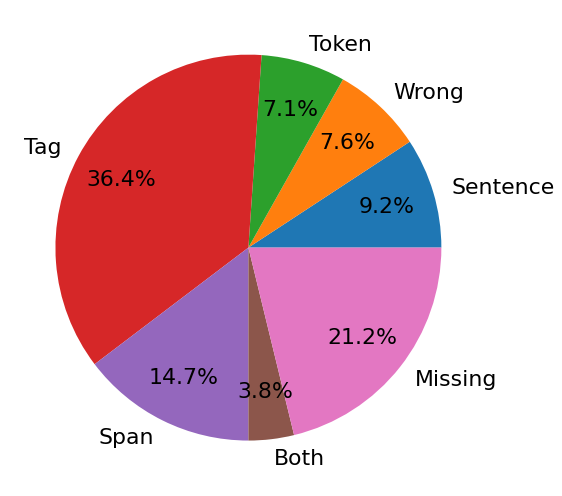

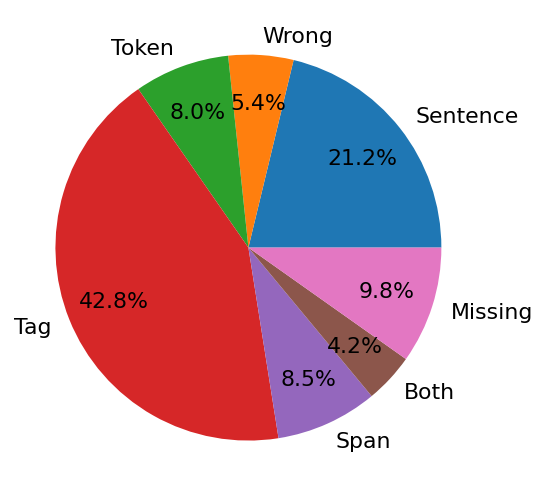

In [25]:
plt.figure()
plt.pie(x= count_errs_by_type["count_conll_2"].array, labels= count_errs_by_type["error_type"].array, autopct='%1.1f%%', pctdistance= .75, labeldistance = 1.1,textprops={'fontsize': 22})
plt.tight_layout()
savefig("err_distribution_conll_2")
plt.show()

plt.figure()
plt.pie(x= count_errs_by_type["count_conll_3"].array, labels= count_errs_by_type["error_type"].array, autopct='%1.1f%%', pctdistance= .75, labeldistance = 1.1,textprops={'fontsize': 22})
plt.tight_layout()
savefig("err_distribution_conll_3")
plt.show()

<Figure size 1008x504 with 0 Axes>

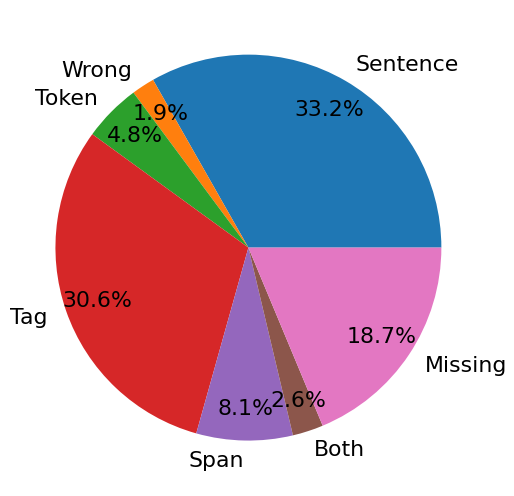

<Figure size 1008x504 with 0 Axes>

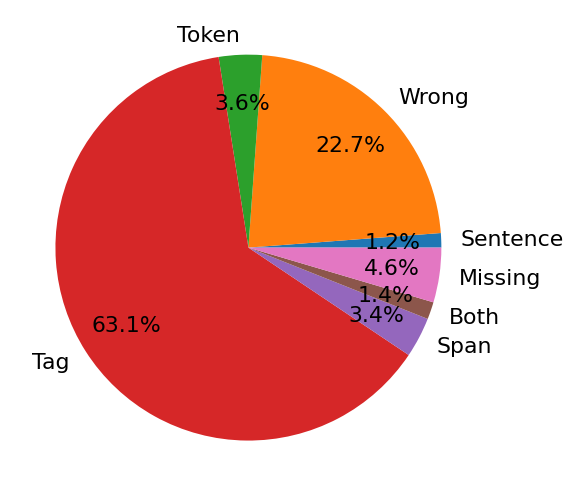

In [26]:
plt.clf()
plt.figure()
plt.pie(x= count_errs_by_type["count_conll_4"].array, labels= count_errs_by_type["error_type"].array, autopct='%1.1f%%', pctdistance= .83, labeldistance = 1.1,textprops={'fontsize': 22})
plt.tight_layout()
savefig("err_distribution_conll_4")
plt.show()

plt.clf()
plt.figure()
plt.pie(x= count_errs_by_type["count_hand"].array, labels= count_errs_by_type["error_type"].array, autopct='%1.1f%%', pctdistance= .75, labeldistance = 1.1,textprops={'fontsize': 22})
plt.tight_layout()
savefig("err_distribution_hand")
plt.show()

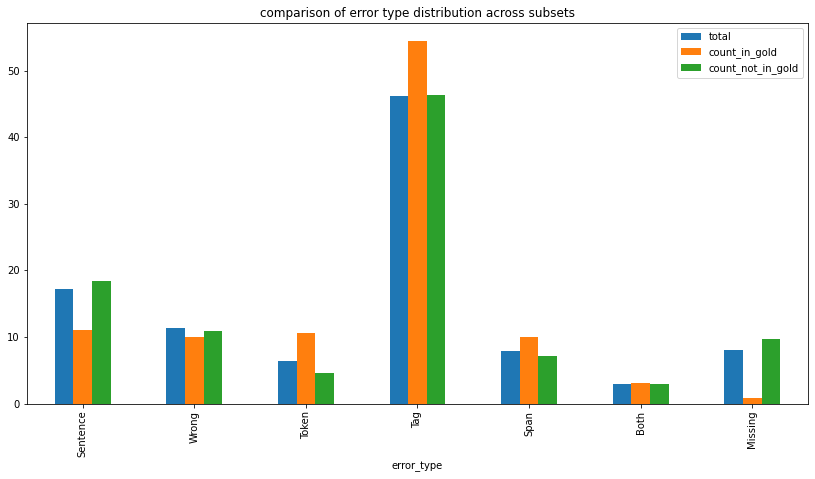

In [27]:
count_errs_by_type.plot("error_type",["total", "count_in_gold","count_not_in_gold"], kind = "bar", title= "comparison of error type distribution across subsets")

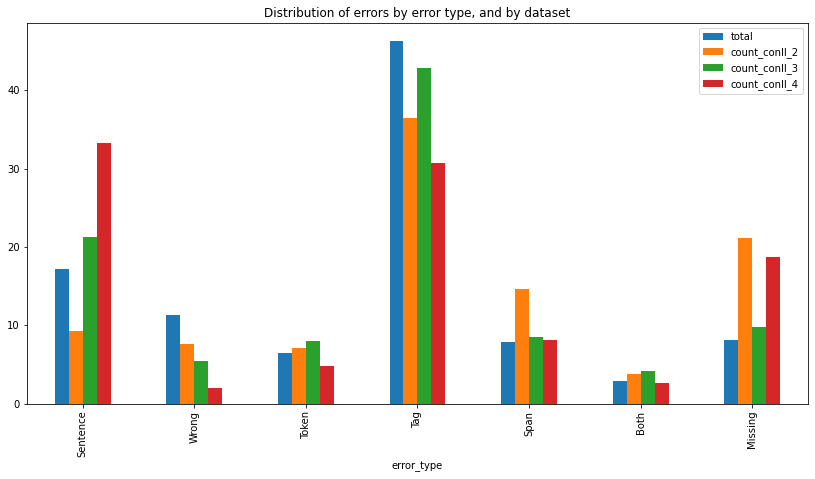

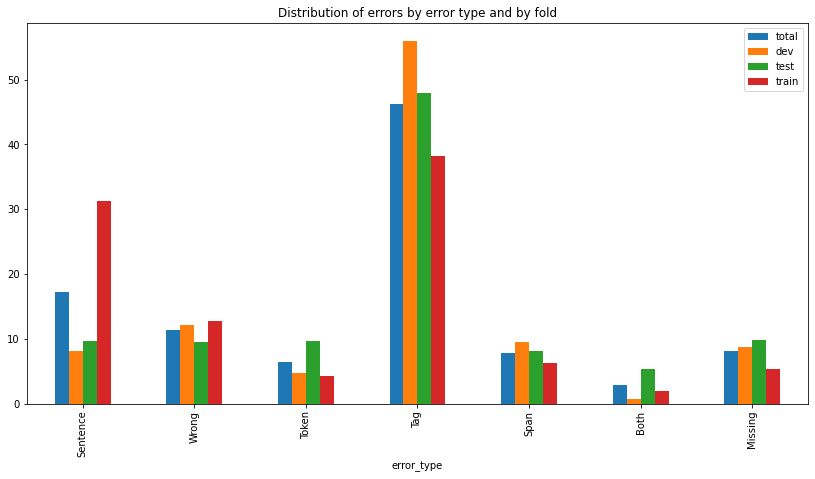

In [28]:
count_errs_by_type.plot("error_type",['total',"count_conll_2", "count_conll_3", "count_conll_4"],legend= ['a', 'b', 'c'] , kind = "bar", title= "Distribution of errors by error type, and by dataset")
#count_errs_by_type.plot("error_type","total",kind = "bar", title= "Distribution of errors by error type")
count_errs_by_type.plot("error_type",["total","dev", "test", "train"], kind = "bar", title= "Distribution of errors by error type and by fold")


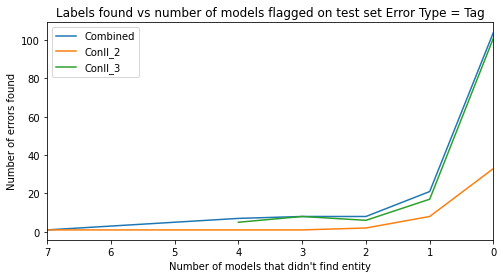

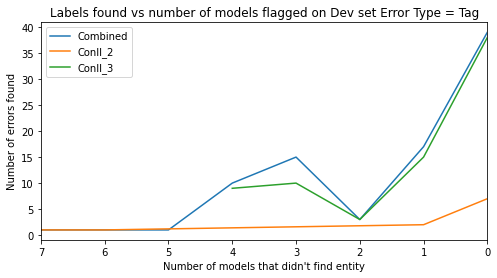

In [29]:
error_type_to_disp = "Tag" 

# a little helper function to improve readability
def get_fold(df,fold):
    return df[df["fold"] ==fold]

data_df = labels_by_error_type[error_type_to_disp] 
data_df_conll_2 = data_df[data_df["conll_2"] &(~data_df["num_models_missing"].isna())]
data_df_conll_3 = data_df[data_df["conll_3"] &(~data_df["num_models_missing"].isna())]

counts_total = make_counts(data_df)

counts_conll_2 = make_counts(data_df_conll_2)
counts_conll_3 = make_counts(data_df_conll_3)




#plot test set
plt.figure(figsize = [8, 4])
plt.xlim((7,0))
plt.title("Labels found vs number of models flagged on test set Error Type = " +error_type_to_disp)
plt.xlabel("Number of models that didn't find entity")
plt.ylabel("Number of errors found")
plt.plot(get_fold(counts_total,"test")["num_models_missing"], get_fold(counts_total,"test")["total"], label="Combined")
plt.plot(get_fold(counts_conll_2,"test")["num_models_missing"], get_fold(counts_conll_2,"test")["total"], label="Conll_2")
plt.plot(get_fold(counts_conll_3,"test")["num_models_missing"], get_fold(counts_conll_3,"test")["total"], label="Conll_3")
plt.legend()




#plot dev set
plt.figure(figsize = [8, 4])
plt.xlim((7,0))
plt.title("Labels found vs number of models flagged on Dev set Error Type = " +error_type_to_disp)
plt.xlabel("Number of models that didn't find entity")
plt.ylabel("Number of errors found")
plt.plot(get_fold(counts_total,"dev")["num_models_missing"], get_fold(counts_total,"dev")["total"], label="Combined")
plt.plot(get_fold(counts_conll_2,"dev")["num_models_missing"], get_fold(counts_conll_2,"dev")["total"], label="Conll_2")
plt.plot(get_fold(counts_conll_3,"dev")["num_models_missing"], get_fold(counts_conll_3,"dev")["total"], label="Conll_3")
plt.legend()



In [30]:
# show frequency distribution for given document
def count_error_distribution_for_doc(Doc_num, fold):
    counts = []
    for tag in Error_types: 
        df = labels_by_error_type[tag] #make a reference to the dataframe
        df = df[(df["doc_offset"] == Doc_num) & (df["fold"] == fold)]
        
        temp_dict = {}
        temp_dict["error_type"] = tag
        temp_dict["count"] = df.shape[0]
        temp_dict["count_conll_2"] = df[df["conll_2"]].shape[0]
        temp_dict["count_conll_3"] = df[df["conll_3"]].shape[0]
        temp_dict["count_conll_4"] = df[df["conll_4"]].shape[0]
        counts.append(temp_dict)
    return pd.DataFrame(counts) 

count_error_distribution_for_doc(35,"test")

,error_type,count,count_conll_2,count_conll_3,count_conll_4
0,Sentence,0,0,0,0
1,Wrong,0,0,0,0
2,Token,0,0,0,0
3,Tag,0,0,0,0
4,Span,0,0,0,0
5,Both,0,0,0,0
6,Missing,0,0,0,0


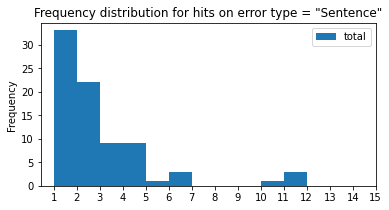

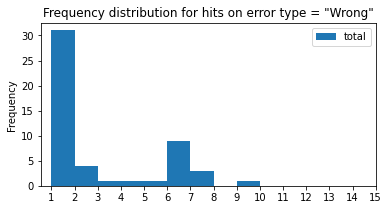

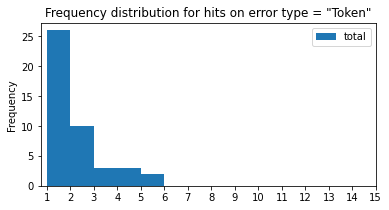

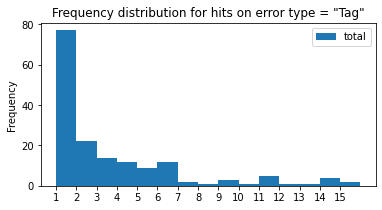

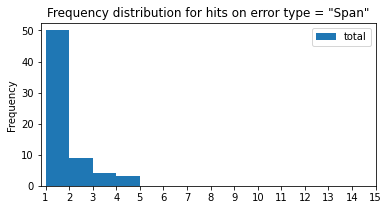

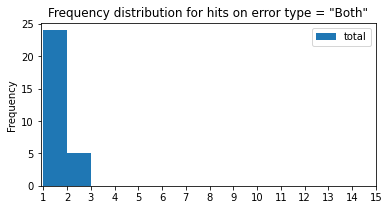

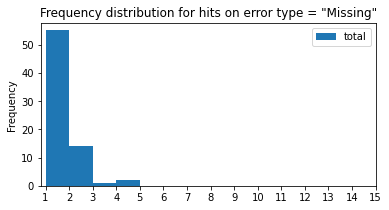

In [31]:
#find histogram of hits for dataset on given error type (may apply multiple times to get different looking data set)
def graph_hit_frequency_for_err_type(error_type):
    df = labels_by_error_type[error_type]
    counts =(df[["doc_offset", "fold"]]
            .groupby(["doc_offset","fold"])
            .aggregate({"doc_offset": "count"})
            .rename(columns={"doc_offset": "total"})
            .reset_index() )
    
    max_val = counts["total"].max()
    counts.drop("doc_offset", axis=1).plot.hist(xticks = range(1,16),bins = max_val-1, figsize = (6,3),
                title = "Frequency distribution for hits on error type = \"" + error_type + "\"")
    return counts; 

frequency_by_err_types = {}
for e_type in Error_types: 
    frequency_by_err_types[e_type] = graph_hit_frequency_for_err_type(e_type)

In [32]:
frequency_by_err_types["Token"]

,doc_offset,fold,total
0,3,test,2
1,15,dev,5
2,22,test,1
3,27,test,3
4,29,test,2
5,39,dev,2
6,39,test,1
7,54,test,6
8,56,test,4
9,60,dev,1


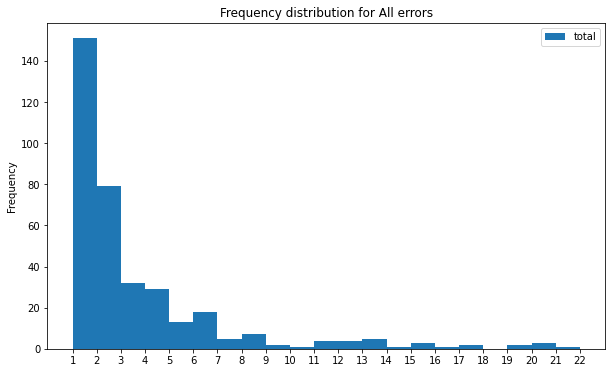

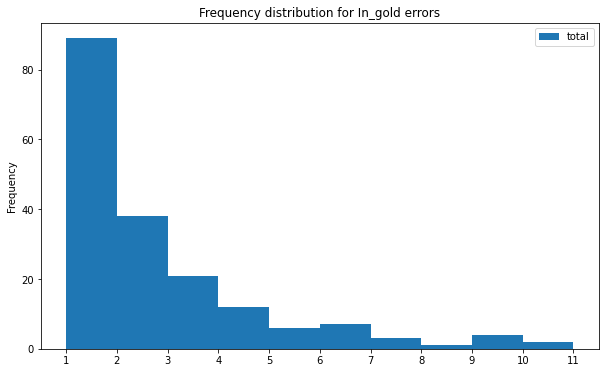

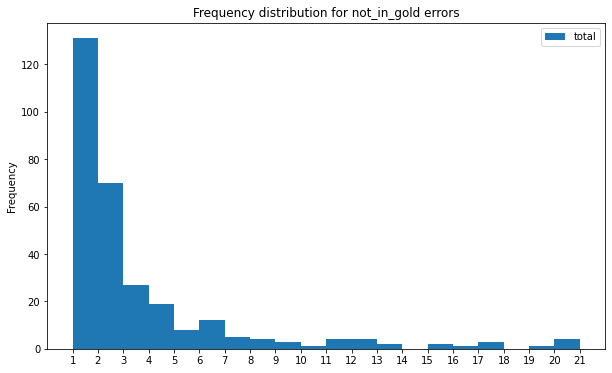

In [33]:

def make_doc_histogram(selection, selection_name):
    df = selection[selection["error_type"] != "None"]
    counts =(df[["doc_offset", "fold"]]
                .groupby(["doc_offset","fold"])
                .aggregate({"doc_offset": "count"})
                .rename(columns={"doc_offset": "total"})
                .reset_index() )
    max_val = counts["total"].max()
    counts.plot("doc_offset","total", kind="hist", xticks= range(1,max_val +1), figsize = (10,6), bins = max_val-1,
                title = "Frequency distribution for " +selection_name  )

make_doc_histogram(all_labels, "All errors")
make_doc_histogram(all_labels_in_gold, "In_gold errors")
make_doc_histogram(all_labels_not_in_gold, "not_in_gold errors")



In [34]:
##print out all_labels dataset as a csv 

ALL_LABELS_OUTPUT_FILE_NAME = "data/all_conll_corrections_combined.csv"

write_columns = [ "fold", "doc_offset", "corpus_span", 
                   "corpus_ent_type", "error_type",
                   "correct_span","correct_ent_type", "agreeing_models",  "notes", "conll_2", "conll_3", "conll_4" ]

write_file = all_labels[write_columns]

write_file.loc[:,"hand_labelled"] = write_file["agreeing_models"].isna()

write_file = write_file[write_file.error_type != "None"]
write_file.rename(columns = {"conll_2" : "Original entrants ensemble", "conll_3" : "custom models ensemble", "conll_4" : "cross validation ensemble"}, inplace = True)



write_file.to_csv(ALL_LABELS_OUTPUT_FILE_NAME)
print("Done")

Done


/home/hong/.venvs/text-extensions/lib64/python3.6/site-packages/pandas-1.0.5-py3.6-linux-x86_64.egg/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/hong/.venvs/text-extensions/lib64/python3.6/site-packages/pandas-1.0.5-py3.6-linux-x86_64.egg/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [579]:
write_file

fold  doc_offset               corpus_span corpus_ent_type error_type  \
4      dev           2     [122, 129): 'England'             LOC        Tag   
5      dev           2  [1354, 1362): 'Scotland'             LOC        Tag   
7      dev           2   [235, 244): 'Australia'             LOC        Tag   
9      dev           2    [525, 533): 'Scotland'             LOC        Tag   
10     dev           2     [61, 70): 'Australia'             LOC        Tag   
...    ...         ...                       ...             ...        ...   
3025  <NA>        <NA>    [419, 427): 'EUROLIRA'             ORG        Tag   
3026  <NA>        <NA>    [732, 740): 'Pakistan'             LOC        Tag   
3027  <NA>        <NA>    [84, 94): 'JOHNSON CO'             ORG       Span   
3028  <NA>        <NA>                      <NA>            <NA>    Missing   
3029  <NA>        <NA>       [2264, 2267): 'RBI'            MISC      Wrong   

                            correct_span correct_ent_type agreeing_models  \
4                  [122, 129): 'England'              ORG             NaN   
5               [1354, 1362): 'Scotland'              ORG             NaN   
7                [235, 244): 'Australia'              ORG             NaN   
9                 [525, 533): 'Scotland'              ORG             NaN   
10                 [61, 70): 'Australia'              ORG             NaN   
...                                  ...              ...             ...   
3025              [419, 427): 'EUROLIRA'             MISC             NaN   
3026              [732, 740): 'Pakistan'              ORG             NaN   
3027             [84, 95): 'JOHNSON CO.'              NaN             NaN   
3028  [854, 874): 'Overseas Development'              ORG             NaN   
3029                                <NA>              NaN             NaN   

                                                  notes  \
4                                          Cricket team   
5                                                   NaN   
7                                          Cricket team   
9                                          Cricket team   
10                                         Cricket team   
...                                                 ...   
3025  Reference to futures contracts on Euro/Lira ex...   
3026                                       Cricket team   
3027  Sentence boundary between period and comma con...   
3028  Reference to Britain's Overseas Development Ad...   
3029                                      Run batted in   

      Original entrants ensemble  custom models ensemble  \
4                          False                    True   
5                          False                    True   
7                          False                    True   
9                          False                    True   
10                         False                    True   
...                          ...                     ...   
3025                       False                    True   
3026                       False                   False   
3027                       False                    True   
3028                       False                   False   
3029                       False                    True   

      cross validation ensemble  hand_labelled  
4                         False           True  
5                         False           True  
7                         False           True  
9                         False           True  
10                        False           True  
...                         ...            ...  
3025                      False           True  
3026                       True           True  
3027                      False           True  
3028                       True           True  
3029                      False           True  

[1211 rows x 13 columns]

In [581]:
pd.options.display.max_rows = 60
all_labels[(all_labels["error_type"] == "Token") & (all_labels["fold"] == 'test')]

,num_models,fold,doc_offset,model_span,model_ent_type,error_type,corpus_span,corpus_ent_type,correct_span,correct_ent_type,notes,subset,conll_2,num_models_missing,agreeing_models,conll_3,conll_4,hand_labelled
985,<NA>,test,3,<NA>,NaN,Token,"[21, 37): 'SKIING-WORLD CUP'",MISC,"[28, 37): 'WORLD CUP'",MISC,NaN,not_in_gold,False,<NA>,NaN,False,False,True
986,0,test,3,NaN,NaN,Token,"[21, 37): 'SKIING-WORLD CUP'",MISC,"[28,37)'WORLD CUP'",NaN,CHECK span later,in_gold,False,0,17,True,False,False
1092,0,test,22,NaN,NaN,Token,"[19, 23): 'ARAB'",MISC,"[19, 35): 'ARAB CONTRACTORS'",NaN,NaN,both,False,0,17,True,False,False
1193,0,test,27,NaN,NaN,Token,"[565, 573): 'X-DENVER'",MISC,"[567, 573): 'DENVER'",ORG,"split on '-', X"" is an annotation""",in_gold,True,0,16,True,False,False
1194,10,test,27,"[565, 573): 'X-DENVER'",ORG,Token,<NA>,<NA>,"[567, 573): 'DENVER'",NaN,"""X-"" prefix is a footnote, meaning ""CLINCHED D...",not_in_gold,True,6,10,False,False,False
1199,0,test,27,NaN,NaN,Token,"[889, 900): 'Y-GREEN BAY'",MISC,"[891, 900): 'GREEN BAY'",ORG,"split on '-', Y"" is an annotation""",in_gold,True,0,16,True,False,False
1221,0,test,29,NaN,NaN,Token,"[25, 44): 'FOOTBALL-OHIO STATE'",MISC,"[34, 44): 'OHIO STATE'",ORG,"Need to split on '-' ""FOOTBALL-OHIO""",both,True,0,16,False,False,False
1222,0,test,29,NaN,NaN,Token,"[25, 44): 'FOOTBALL-OHIO STATE'",MISC,"[34,44): 'OHIO STATE'",ORG,NaN,in_gold,False,0,17,True,False,False
1271,<NA>,test,39,<NA>,NaN,Token,"[1158, 1175): 'AbelardoFernandez'",PER,"[1158, 1175): 'Abelardo Fernandez'",PER,"Missing space between ""Abelardo"" and ""Fernandez"".",not_in_gold,False,<NA>,NaN,False,False,True
1379,0,test,54,NaN,NaN,Token,"[1145, 1152): 'Boxmeer'",PER,"[1141, 1152): 'van Boxmeer'",NaN,NaN,both,False,0,17,True,False,False
